In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/IFC-37/Downloads/Suicides in India 2001-2012.csv")

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

df.shape


Number of rows 237519
Number of columns 7


(237519, 7)

In [5]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
df.columns


Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [7]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [8]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

In [9]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [10]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
statewise_df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [13]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

In [14]:
statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

In [15]:
statewise_df = statewise_df.set_index(pd.Index([i for i in range(0,101110)]))
statewise_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
101105,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
101106,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
101107,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
101108,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


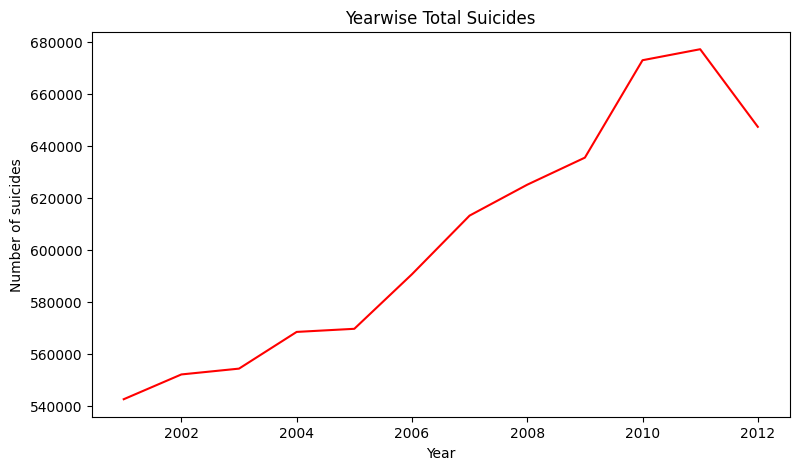

In [16]:
yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

# in as the year increasing the number of suicide is also increasing and after 2011 it suddenly drop

#  Q statewise no of sucide

total no of suicide in each state State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496
West Ben

Text(0, 0.5, 'Total')

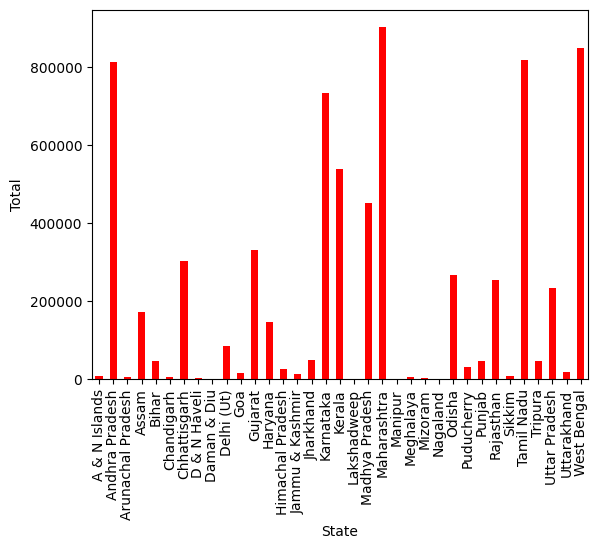

In [19]:
statewise_suicide=statewise_df.groupby("State")["Total"].sum()
print("total no of suicide in each state",statewise_suicide)
statewise_suicide.plot(kind='bar' ,fig=(9,5),color='r')
plt.xlabel('State')
plt.ylabel("Total")

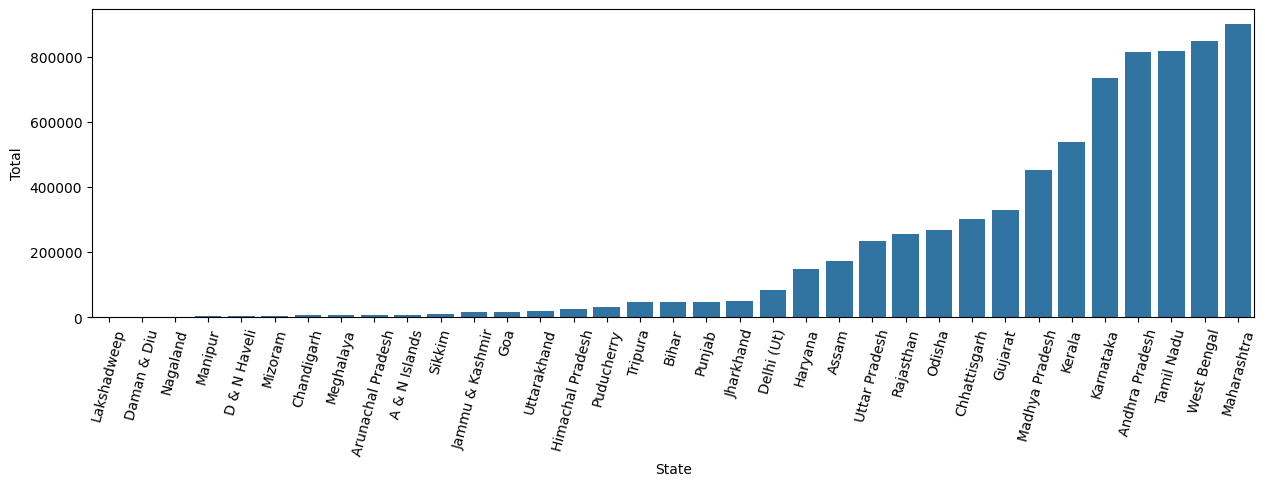

In [20]:
filter_state = pd.DataFrame(statewise_suicide.reset_index()) 
sort_state = filter_state.sort_values('Total',ascending = True)
f, ax = plt.subplots(figsize=(15, 4))
#sns.barplot(y = 'Total', x = 'State',data = sort_state,edgecolor = '0.5')
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75);
plt.show()

Type
Bankruptcy or Sudden change in Economic Status    3007538
By Consuming Insecticides                         5233028
By Consuming Other Poison                         5923219
By Drowning                                       5235087
By Fire-Arms                                      2480028
                                                   ...   
Student                                           3720241
Suspected/Illicit Relation                        2849431
Unemployed                                        4863751
Unemployment                                      2816971
Widowed/Widower                                   1256072
Name: Year, Length: 67, dtype: int64
total no of suicide in each state Type
Bankruptcy or Sudden change in Economic Status    3007538
By Consuming Insecticides                         5233028
By Consuming Other Poison                         5923219
By Drowning                                       5235087
By Fire-Arms                                     

Text(0, 0.5, 'Total')

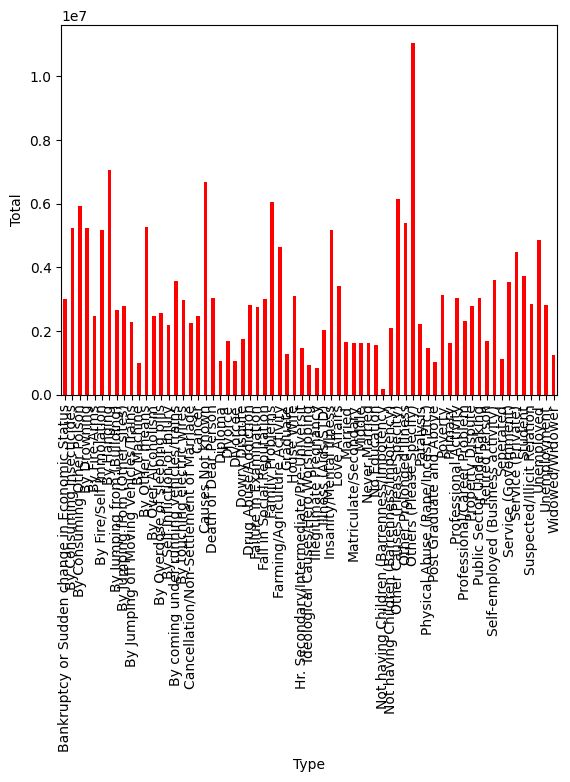

In [21]:
# suicide according to the cause in each year
type_year=statewise_df.groupby("Type")["Year"].sum()
print(type_year)
print("total no of suicide in each state",type_year)
type_year.plot(kind='bar' ,fig=(9,5),color='r')
plt.xlabel('Type')
plt.ylabel("Total")



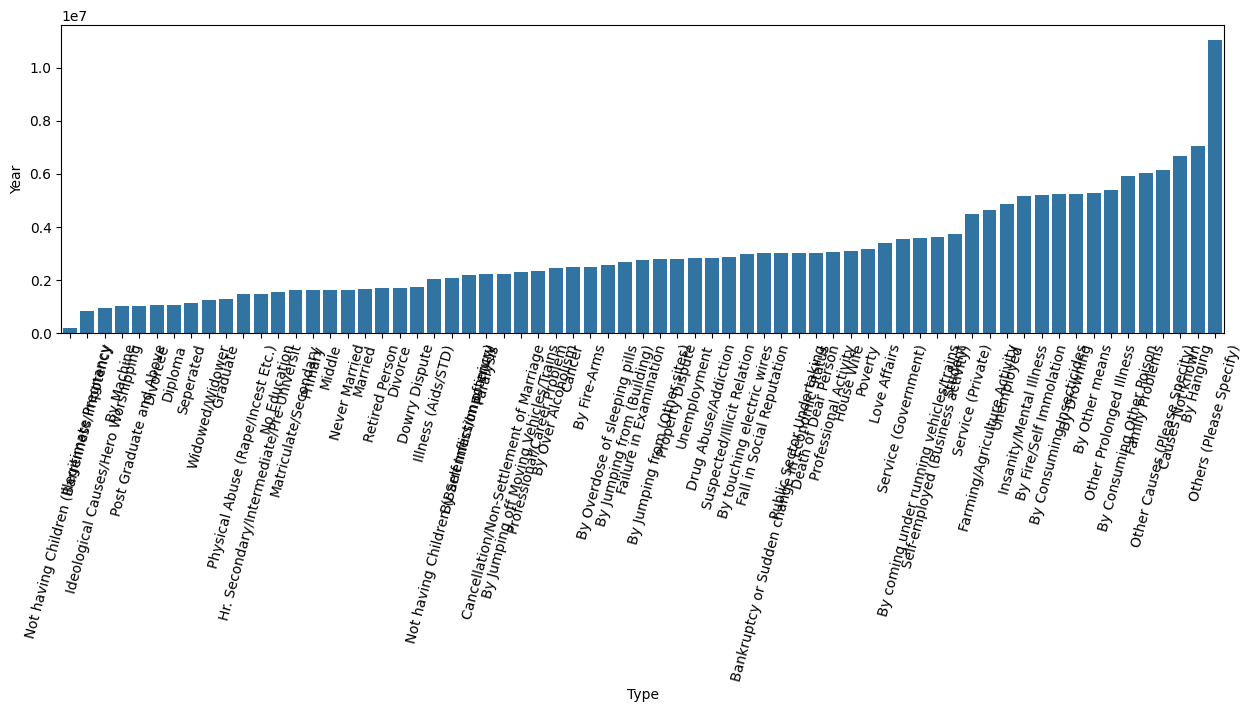

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum 'Year' by 'Type' (assuming 'Year' is a numeric column)
type_year = statewise_df.groupby("Type")["Year"].sum().reset_index()

# Sorting the dataframe by the summed Year column
sorted_type_year = type_year.sort_values('Year', ascending=True)

# Creating the bar plot
f, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x='Type', y='Year', data=sorted_type_year)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Display the plot
plt.show()


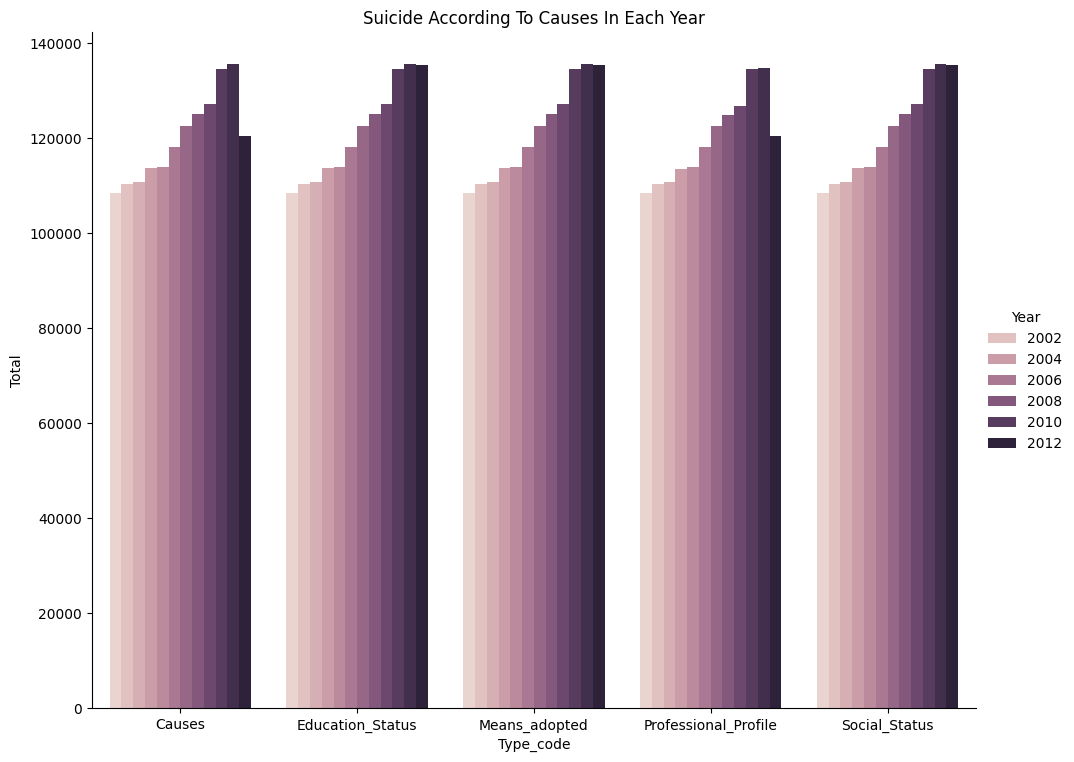

In [23]:
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

# suicide According to gender


Gender
Male      54841
Female    46269
Name: count, dtype: int64


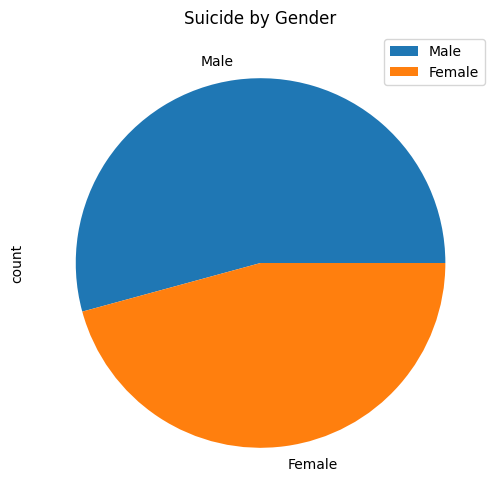

In [25]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

# proportion male is greater than female hence it is observed that male suicide is greater

# Suicides By The Educational Background

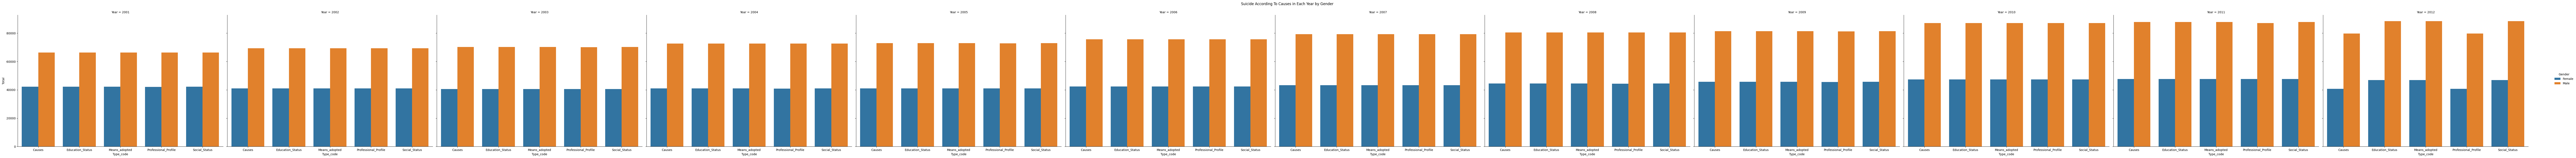

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by Type_code, Year, and Gender
filter_type_code_gender = pd.DataFrame(statewise_df.groupby(["Type_code", "Year", "Gender"])["Total"].sum()).reset_index()

# Plotting with hue = Gender to differentiate between male and female
sns.catplot(x="Type_code", y="Total", hue="Gender", col="Year", kind="bar", data=filter_type_code_gender, height=7.5, aspect=10/7.5)

# Add a title to the plot
plt.subplots_adjust(top=0.9)  # Adjusting title position
plt.suptitle('Suicide According To Causes in Each Year by Gender')

# Display the plot
plt.show()


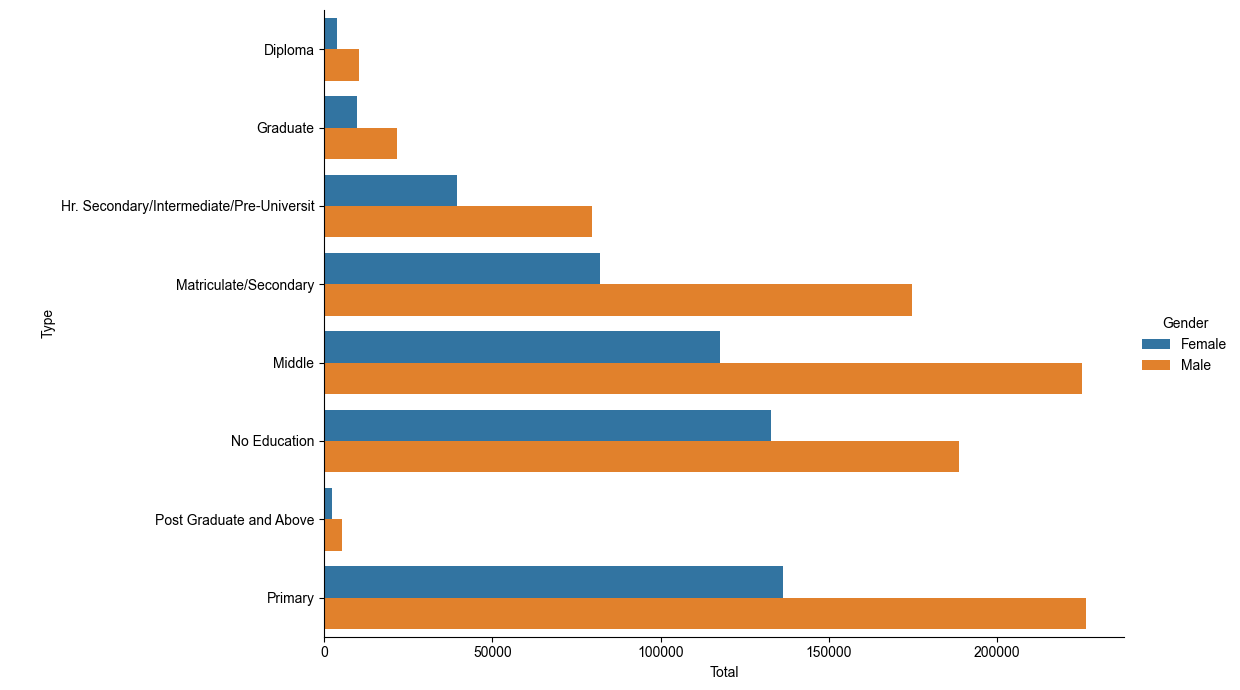

In [29]:
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

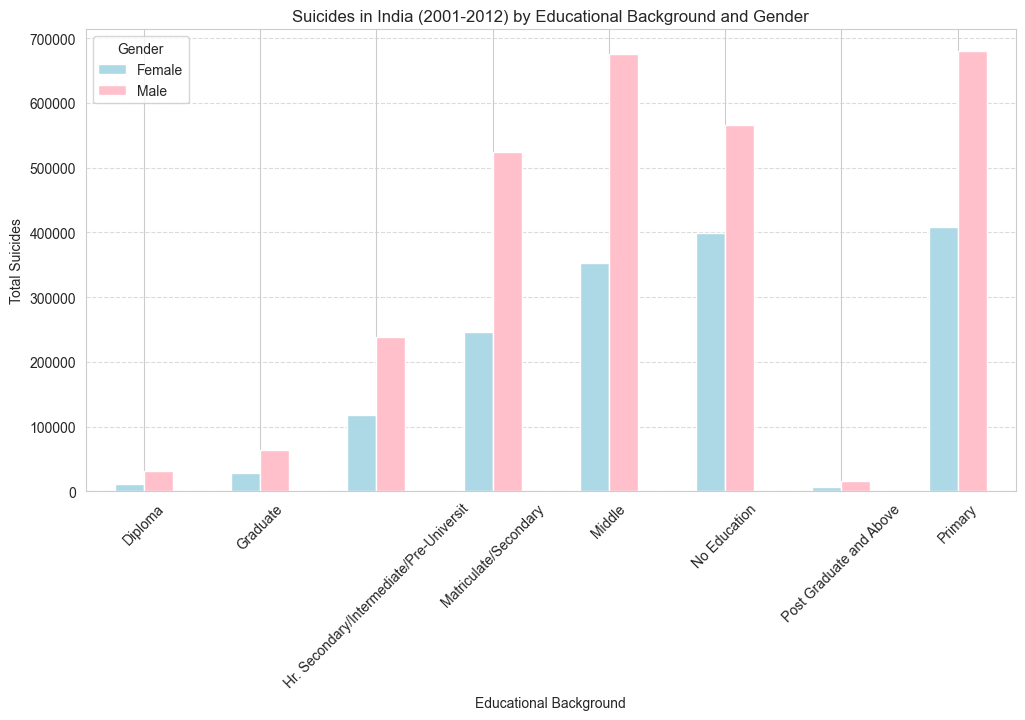

In [30]:
# Filter data for suicides based on educational background
education_suicides = df[df["Type_code"] == "Education_Status"]
education_genderwise_suicides = education_suicides.groupby(["Type", "Gender"])["Total"].sum().unstack()
education_genderwise_suicides.plot(kind="bar", figsize=(12, 6), color=["lightblue", "pink"])
plt.xlabel("Educational Background")
plt.ylabel("Total Suicides")
plt.title("Suicides in India (2001-2012) by Educational Background and Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

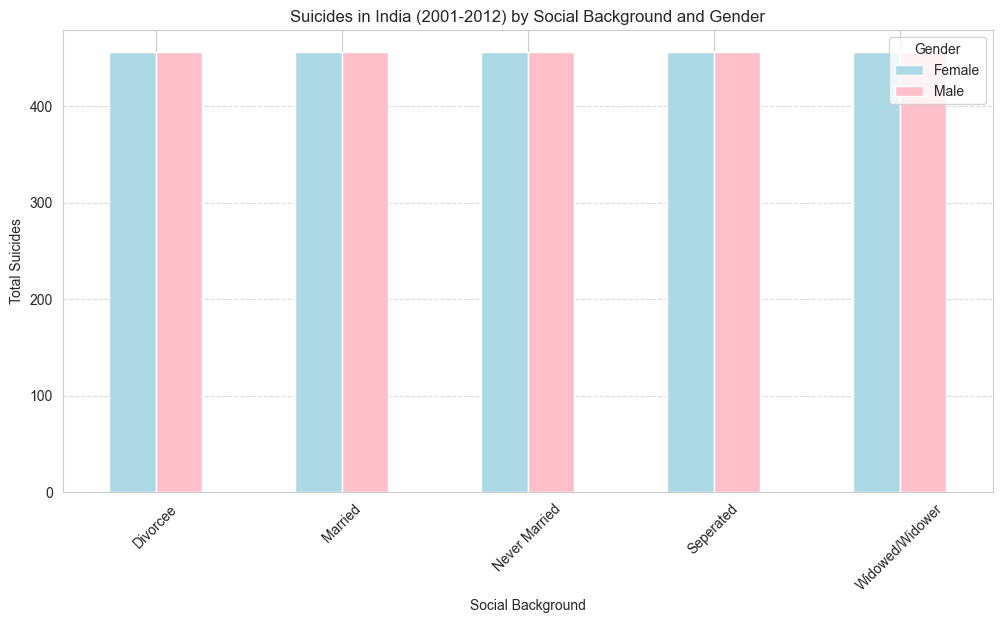

In [31]:
# Filter data for social status suicides
social_suicide = df[df['Type_code'] == "Social_Status"]

# Group by 'Type' and 'Gender' and count the occurrences
social = social_suicide.groupby("Type")["Gender"].value_counts().unstack(fill_value=0)

# Plotting the data

social.plot(kind="bar", figsize=(12, 6), color=["lightblue", "pink"])

# Adding labels and title
plt.xlabel("Social Background")
plt.ylabel("Total Suicides")
plt.title("Suicides in India (2001-2012) by Social Background and Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Adding a grid for y-axis for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [32]:
df['Type_code'].unique()


array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

# suicide by age group


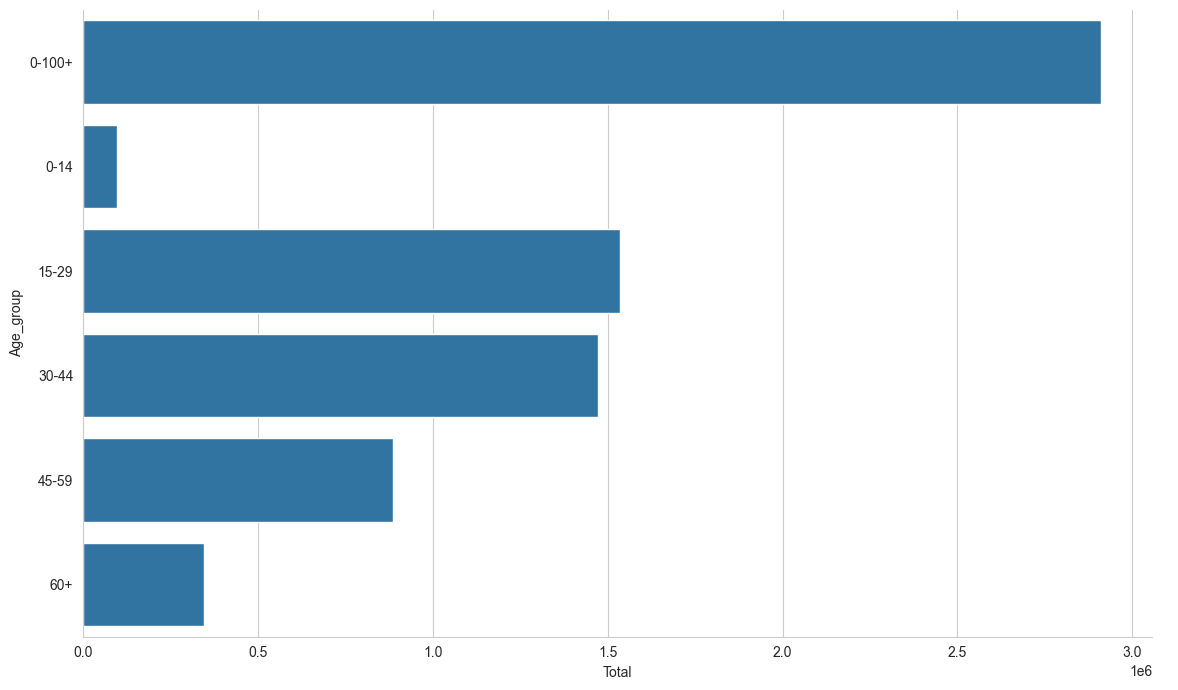

In [68]:
age_group_suicide = pd.DataFrame(statewise_df.groupby("Age_group")["Total"].sum()).reset_index()

# Plotting the data
g = sns.catplot(y="Age_group", x="Total", kind="bar", data=age_group_suicide, height=7, aspect=11.7/7)

# Adding the style for better aesthetics
sns.set_style('whitegrid')

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


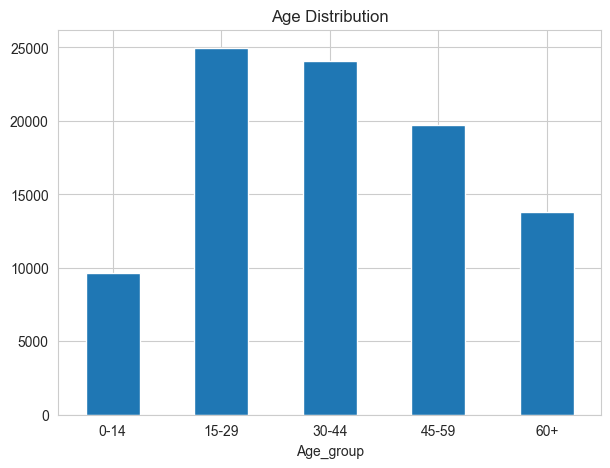

In [70]:
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()